In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('iris.csv')

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.duplicated().sum()

np.int64(3)

In [18]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
88,5.6,3.0,4.1,1.3,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa


In [20]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

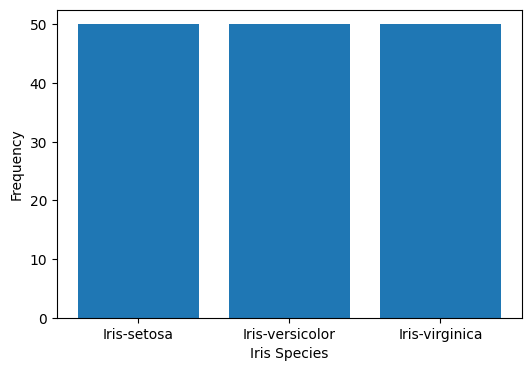

In [21]:
counts=df['Species'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(x=counts.index,height=counts.values)
plt.xlabel("Iris Species")
plt.ylabel("Frequency")
plt.savefig("image.png")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop(columns=["Species"])
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(120, 4)
(30, 4)
(120,)
(30,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [27]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_preds=knn.predict(X_test)
print(f"Accuracy={accuracy_score(y_test,y_preds)}")
print(f"Classification Report\n {classification_report(y_test,y_preds)}")

Accuracy=1.0
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



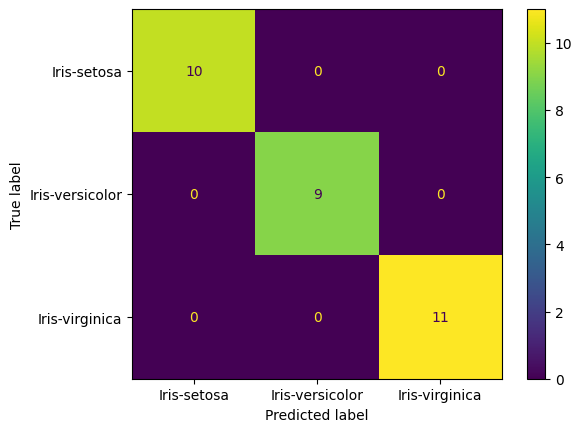

In [28]:
cm=confusion_matrix(y_test,y_preds)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df['Species'].unique())
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [4]:
joblib.dump(model, "model.joblib")

['model.joblib']

Note: you may need to restart the kernel to use updated packages.
